# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below

In [145]:
import pandas as pd

df = pd.read_csv("data.csv")
ori_df = pd.read_csv("data.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [146]:
# YOUR CODE HERE
df["quality rating"].unique()

array([ 6,  7,  4,  8,  3,  1,  2, 10,  5,  9])

👇 Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [147]:
df["quality rating"].value_counts()

10    10143
5     10124
1     10090
2     10030
8      9977
6      9961
9      9955
7      9954
4      9928
3      9838
Name: quality rating, dtype: int64

In [148]:
# YOUR CODE HERE
df["quality rating"]=df["quality rating"].apply(lambda x: 0 if x < 6 else 1)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,1
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,1
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,0
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,1
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,6.93,4.49,8.25,8.60,9.41,11.07,8.38,10.89,12.42,8.99,1
99996,10.57,9.56,9.83,8.98,9.77,10.04,10.87,11.28,9.57,8.97,1
99997,10.23,10.98,11.74,11.76,8.87,9.03,9.93,9.86,10.04,8.66,0
99998,7.25,3.95,7.03,8.90,8.49,9.75,11.45,10.21,8.32,9.44,1


👇 Check the class balance of the new binary target

In [149]:
# YOUR CODE HERE
df["quality rating"].value_counts()

0    50010
1    49990
Name: quality rating, dtype: int64

Create your `X` by scaling the features. This will allow for fair comparison of different solvers.

In [150]:
# YOUR CODE HERE
X=df.drop(columns=["quality rating"])
y=df[["quality rating"]]

In [151]:
y

,quality rating
0,1
1,1
2,0
3,1
4,0
...,...
99995,1
99996,1
99997,0
99998,1


<AxesSubplot:>

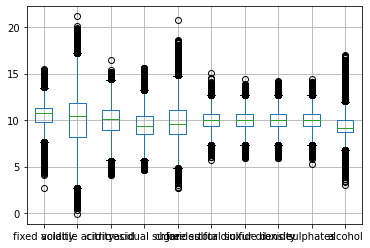

In [152]:
X.boxplot()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

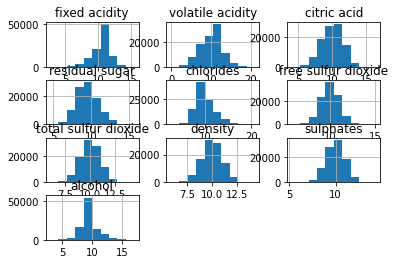

In [153]:
X.hist()

In [154]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

In [155]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol']]=r_scaler.fit_transform(X)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,-0.884354,-1.231405,-1.252294,0.410526,-1.088,-0.634328,-0.162963,-0.358209,0.251852,-0.282443,1
1,-0.489796,-0.440771,-0.151376,-0.531579,0.236,-2.305970,-0.222222,-0.738806,-0.570370,-0.282443,1
2,-0.122449,0.074380,0.344037,0.831579,-0.212,0.313433,1.081481,0.932836,0.992593,-0.083969,0
3,0.156463,-0.550964,-0.811927,0.136842,-0.676,0.686567,-2.244444,0.798507,0.488889,-0.213740,1
4,0.918367,0.826446,0.119266,0.294737,0.612,-0.462687,0.162963,-0.716418,-1.718519,1.687023,0


## 2. LogisticRegression solvers

👇 Logistic Regression models can be optimized using different **solvers**. Find out 
- Which is the `fastest_solver` ?
- What can you say about their respective precision score?

`solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this stackoverflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [156]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression,SGDRegressor
rg_sag_model=LogisticRegression(solver='sag')

In [157]:
cv_sag=cross_validate(rg_sag_model,X,y,scoring="precision")
cv_sag["test_score"].mean()

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d 

0.8739284644469925

In [158]:
%%time
rg_sag_model

CPU times: user 3 µs, sys: 6 µs, total: 9 µs
Wall time: 4.05 µs


LogisticRegression(solver='sag')

In [159]:
%%time
rg_newtoncg_model=LogisticRegression(solver='newton-cg')
rg_newtoncg_model

CPU times: user 23 µs, sys: 56 µs, total: 79 µs
Wall time: 18.8 µs


LogisticRegression(solver='newton-cg')

In [160]:
cv_newtoncg=cross_validate(rg_newtoncg_model,X,y,scoring="precision")
cv_newtoncg["test_score"].mean()

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarnin

0.873932137999161

In [161]:
%%time
rg_lbfgs_model=LogisticRegression(solver='lbfgs')
rg_lbfgs_model

CPU times: user 28 µs, sys: 54 µs, total: 82 µs
Wall time: 17.9 µs


LogisticRegression()

In [162]:
cv_lbfgs=cross_validate(rg_lbfgs_model,X,y,scoring="precision")
cv_lbfgs["test_score"].mean()

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarnin

0.8739780776918222

In [163]:
%%time
rg_liblinear_model=LogisticRegression(solver='liblinear')
rg_liblinear_model

CPU times: user 21 µs, sys: 42 µs, total: 63 µs
Wall time: 17.9 µs


LogisticRegression(solver='liblinear')

In [164]:
cv_liblinear=cross_validate(rg_liblinear_model,X,y,scoring="precision")
cv_liblinear["test_score"].mean()

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarnin

0.8739780776918222

In [165]:
%%time
rg_saga_model=LogisticRegression(solver="saga")
rg_saga_model

CPU times: user 19 µs, sys: 41 µs, total: 60 µs
Wall time: 16.9 µs


LogisticRegression(solver='saga')

In [166]:
cv_saga=cross_validate(rg_saga_model,X,y,scoring="precision")
cv_saga["test_score"].mean()

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d 

0.8739704091946109

In [167]:
# YOUR ANSWER
fastest_solver ='lbfgs'

<details>
    <summary>☝️ Intuition</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function. 

</details> 

###  🧪 Test your code

In [168]:
from nbresult import ChallengeResult

result = ChallengeResult('solvers',
                         fastest_solver=fastest_solver
                         )
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/04-Under-the-hood/02-Solvers
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_solvers.py::TestSolvers::test_fastest_solver PASSED           [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master


## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

👇 Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2.?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [169]:
X.shape

(100000, 10)

In [170]:
y

,quality rating
0,1
1,1
2,0
3,1
4,0
...,...
99995,1
99996,1
99997,0
99998,1


In [171]:
y.shape

(100000, 1)

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier
# YOUR CODE HERE
from sklearn.model_selection import cross_validate
model_SGD_cl=SGDClassifier(loss="log")
cv_score_sgd_cl=cross_validate(model_SGD_cl,X,y,cv=5,scoring="precision")
cv_score_sgd

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarnin

NameError: name 'cv_score_sgd' is not defined

In [ ]:
## YOUR CODE HERE
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# from sklearn.linear_model import LogisticRegression

# Los_model=LogisticRegression(max_iter=1000)
# cv_score=cross_validate(Los_model,X,y,cv=5,
#                        scoring=["accuracy","recall","precision","f1"])
# cv_score


☝️ The SGD model should have the shortest training time, for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single data point.

## 4. Predictions

👇 Use the best model to predict the binary quality (0 or 1) of the following wine. Store your
- `predicted_class`
- `predicted_proba_of_class`

In [173]:
new_data = pd.read_csv('new_data.csv')

new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [174]:
model_SGD_cl.fit(X,y)

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(loss='log')

In [175]:
# YOUR CODE HERE
predicted_class=model_SGD_cl.predict(new_data)
predicted_class

array([0])

In [176]:
predicted_proba_of_class=model_SGD_cl.predict_proba(new_data)[0][0]
predicted_proba_of_class

0.9578308260588728

# 🏁  Check your code and push your notebook

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())